In [1]:
%%html
<style>
table {float:left}
</style>

### BDA Project : Fake News Detection

|Name|ROll No.|
|:-| -:| 
|Vikas Kumar|2K17/CO/370|
|Tarunesh Kumar Gautam|2K17/EE/222|
|Hemprakash Meena|2K17/EE/090|
|Yashpal|2K17/CO/387|

In [1]:
import numpy as np
import pandas as pd

In [2]:
fake_news = pd.read_csv('Fake.csv')
fake_news

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
fake_news['flag'] = 0
fake_news

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [4]:
real_news = pd.read_csv('True.csv')
real_news

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [5]:
real_news['flag'] = 1
real_news

,title,text,subject,date,flag
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [6]:
# concatenating fake_news and real_news
news = [fake_news, real_news]
news  = pd.concat(news, ignore_index=True)
news

,title,text,subject,date,flag
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [7]:
# shuffle dataset
news = news.sample(frac=1 )
news

,title,text,subject,date,flag
26593,Exclusive: Trump administration eyes hardening...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"June 20, 2017",1
14664,BREAKING: OBAMA JUST RELEASED GITMO Prisoner W...,"// <![CDATA[ (function(d, s, id) { var js, fjs...",politics,"Jan 12, 2016",0
30531,U.S. to continue supporting engagement with Cu...,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,"November 26, 2016",1
30304,Commentary: Trump can't fight Islamic State wi...,Over the course of the U.S. presidential campa...,politicsNews,"December 7, 2016",1
11248,VICE PRESIDENT PENCE BREAKS TIE In Bill Allowi...,A society can be judged by how it deals with ...,politics,"Mar 30, 2017",0
...,...,...,...,...,...
16956,UNBELIEVABLE: OBAMA Stands Firm On Taking Rand...,This isn t the first time Obama left an import...,Government News,"Nov 24, 2015",0
34801,Hundreds sacked from Uzbek FinMin in 'rat' purge,TASHKENT (Reuters) - Uzbekistan s Finance Mini...,worldnews,"December 27, 2017",1
17096,Shame! Last Hope To Kill Iran Nuke Deal Blocke...,"Just like Obamacare was pushed through, the Ir...",Government News,"Sep 18, 2015",0
11999,WHEW! AMB JOHN BOLTON Will Make Your Day With ...,.@AmbJohnBolton on Obama legacy: He s history...,politics,"Jan 4, 2017",0


### Data Visualization

<AxesSubplot:xlabel='count', ylabel='subject'>

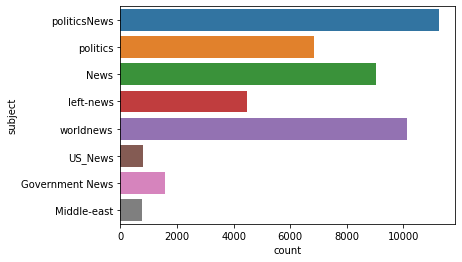

In [8]:
import seaborn as sns
sns.countplot(y = "subject", data = news)

In [9]:
# save data for manual verification of model

news_manual_testing = news.tail(20)
news_manual_testing.to_csv('news_manual_testing')
news.drop(news.tail(20).index,inplace=True) # drop last n rows
news

,title,text,subject,date,flag
26593,Exclusive: Trump administration eyes hardening...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"June 20, 2017",1
14664,BREAKING: OBAMA JUST RELEASED GITMO Prisoner W...,"// <![CDATA[ (function(d, s, id) { var js, fjs...",politics,"Jan 12, 2016",0
30531,U.S. to continue supporting engagement with Cu...,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,"November 26, 2016",1
30304,Commentary: Trump can't fight Islamic State wi...,Over the course of the U.S. presidential campa...,politicsNews,"December 7, 2016",1
11248,VICE PRESIDENT PENCE BREAKS TIE In Bill Allowi...,A society can be judged by how it deals with ...,politics,"Mar 30, 2017",0
...,...,...,...,...,...
38724,War crimes court backs Burundi investigation,AMSTERDAM (Reuters) - The International Crimin...,worldnews,"November 9, 2017",1
31008,"Fending off foes, Clinton blazes a trail with ...",WASHINGTON (Reuters) - Hillary Clinton has one...,politicsNews,"November 6, 2016",1
33649,Biden makes the case for Obama's Supreme Court...,WASHINGTON (Reuters) - Joe Biden on Thursday r...,politicsNews,"March 24, 2016",1
28959,Courts likely to probe Trump's intent in issui...,NEW YORK (Reuters) - Washington state’s attorn...,politicsNews,"February 13, 2017",1


### Data Cleaning

In [10]:
# remove duplicate
news = news.drop_duplicates()
news.shape

(44669, 5)

In [11]:
# merge subject, title and text to get complete news text data
news['news_data'] = news['subject'] + news['title'] + news['text']
news

<ipython-input-11-6b317700a726>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['news_data'] = news['subject'] + news['title'] + news['text']


,title,text,subject,date,flag,news_data
26593,Exclusive: Trump administration eyes hardening...,WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,"June 20, 2017",1,politicsNewsExclusive: Trump administration ey...
14664,BREAKING: OBAMA JUST RELEASED GITMO Prisoner W...,"// <![CDATA[ (function(d, s, id) { var js, fjs...",politics,"Jan 12, 2016",0,politicsBREAKING: OBAMA JUST RELEASED GITMO Pr...
30531,U.S. to continue supporting engagement with Cu...,WASHINGTON (Reuters) - U.S. Secretary of State...,politicsNews,"November 26, 2016",1,politicsNewsU.S. to continue supporting engage...
30304,Commentary: Trump can't fight Islamic State wi...,Over the course of the U.S. presidential campa...,politicsNews,"December 7, 2016",1,politicsNewsCommentary: Trump can't fight Isla...
11248,VICE PRESIDENT PENCE BREAKS TIE In Bill Allowi...,A society can be judged by how it deals with ...,politics,"Mar 30, 2017",0,politicsVICE PRESIDENT PENCE BREAKS TIE In Bil...
...,...,...,...,...,...,...
38724,War crimes court backs Burundi investigation,AMSTERDAM (Reuters) - The International Crimin...,worldnews,"November 9, 2017",1,worldnewsWar crimes court backs Burundi invest...
31008,"Fending off foes, Clinton blazes a trail with ...",WASHINGTON (Reuters) - Hillary Clinton has one...,politicsNews,"November 6, 2016",1,"politicsNewsFending off foes, Clinton blazes a..."
33649,Biden makes the case for Obama's Supreme Court...,WASHINGTON (Reuters) - Joe Biden on Thursday r...,politicsNews,"March 24, 2016",1,politicsNewsBiden makes the case for Obama's S...
28959,Courts likely to probe Trump's intent in issui...,NEW YORK (Reuters) - Washington state’s attorn...,politicsNews,"February 13, 2017",1,politicsNewsCourts likely to probe Trump's int...


In [12]:
# remove unnecessary data
news = news.drop(['subject', 'title', 'text', 'date'], axis=1)
news

,flag,news_data
26593,1,politicsNewsExclusive: Trump administration ey...
14664,0,politicsBREAKING: OBAMA JUST RELEASED GITMO Pr...
30531,1,politicsNewsU.S. to continue supporting engage...
30304,1,politicsNewsCommentary: Trump can't fight Isla...
11248,0,politicsVICE PRESIDENT PENCE BREAKS TIE In Bil...
...,...,...
38724,1,worldnewsWar crimes court backs Burundi invest...
31008,1,"politicsNewsFending off foes, Clinton blazes a..."
33649,1,politicsNewsBiden makes the case for Obama's S...
28959,1,politicsNewsCourts likely to probe Trump's int...


In [13]:
# check if there is no null values
news.isnull().sum()

flag         0
news_data    0
dtype: int64

In [14]:
# function to convert the news text in lowercase and remove punctuation special chars., extra space, urls
import re
import string
def normalize(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [15]:
# normalizing news text
news["news_data"] = news["news_data"].apply(normalize)
news

,flag,news_data
26593,1,politicsnewsexclusive trump administration ey...
14664,0,politicsbreaking obama just released gitmo pr...
30531,1,politicsnewsu s to continue supporting engage...
30304,1,politicsnewscommentary trump can t fight isla...
11248,0,politicsvice president pence breaks tie in bil...
...,...,...
38724,1,worldnewswar crimes court backs burundi invest...
31008,1,politicsnewsfending off foes clinton blazes a...
33649,1,politicsnewsbiden makes the case for obama s s...
28959,1,politicsnewscourts likely to probe trump s int...


#### Defining independent and dependent variable as x and y

In [17]:
x = news["news_data"]  # independent variable
y = news["flag"]       # dependent variable

#### Splitting the dataset into training set and testing set.

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

#### Convert a collection of raw documents to a matrix of TF-IDF features.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### 1. Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [22]:
LR.score(xv_test, y_test)

0.9880909742120344

In [23]:
pred_lr=LR.predict(xv_test)    
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5893
           1       0.99      0.99      0.99      5275

    accuracy                           0.99     11168
   macro avg       0.99      0.99      0.99     11168
weighted avg       0.99      0.99      0.99     11168



### 2. Decision Tree Classification

In [24]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)  # build a decision tree

DecisionTreeClassifier()

In [25]:
DT.score(xv_test, y_test)

0.9976719197707736

In [26]:
pred_dt = DT.predict(xv_test)
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5893
           1       1.00      1.00      1.00      5275

    accuracy                           1.00     11168
   macro avg       1.00      1.00      1.00     11168
weighted avg       1.00      1.00      1.00     11168



### 3. Gradient Boosting Classifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [29]:
GBC.score(xv_test, y_test)

0.9960601719197708

In [30]:
pred_gbc = GBC.predict(xv_test)

In [31]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5893
           1       0.99      1.00      1.00      5275

    accuracy                           1.00     11168
   macro avg       1.00      1.00      1.00     11168
weighted avg       1.00      1.00      1.00     11168



### 4. Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)    # Build a forest of decision trees from the training set

RandomForestClassifier(random_state=0)

In [34]:
RFC.score(xv_test, y_test)

0.9922994269340975

In [35]:
pred_rfc = RFC.predict(xv_test)
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5893
           1       0.99      0.99      0.99      5275

    accuracy                           0.99     11168
   macro avg       0.99      0.99      0.99     11168
weighted avg       0.99      0.99      0.99     11168



## Model Testing

In [36]:
def result(flag):
    if flag:
        return "real news"
    else:
        return "fake news"

def verify(news):
    news = {"text":[news]}
    news = pd.DataFrame(news)
    news["text"] = news["text"].apply(normalize) 
    news = news["text"]
    news_vector = vectorization.transform(news)
    pred_LR = LR.predict(news_vector)
    pred_DT = DT.predict(news_vector)
    pred_GBC = GBC.predict(news_vector)
    pred_RFC = RFC.predict(news_vector)

    print(f"""
            LR Prediction: {result(pred_LR[0])} \n
            DT Prediction: {result(pred_DT[0])} \n
            GBC Prediction: {result(pred_GBC[0])} \n
            RFC Prediction: {result(pred_RFC[0])}
        """)

In [37]:
news = input()
# news
verify(news)

OKLAHOMA CITY (Reuters) - An Oklahoma bill that allows judges to take into consideration a diagnosis of PTSD for veterans unanimously passed the state Senate on Tuesday, adding to a series of U.S. laws seeking to address mental illness among military veterans. Oklahoma House Bill 2595 allows judges to take into account a diagnosis of post-traumatic stress disorder (PTSD) as a mitigating factor when sentencing veterans who have been diagnosed with the illness. The bill, which now goes to the governor for a decision on approval, follows similar measures in states including Alaska and California.  “This is neither a Democratic or Republican issue, but just something we should have for veterans,” said state Representative Richard Morrissette, a sponsor of the legislation and a Democrat in the Republican-dominated Oklahoma legislature. “We train men and women to defend our nation in combat and then we expect, upon their return to civilian life, the trauma experienced by these individuals to